In [ ]:
#!pip3 install vega_datasets

In [ ]:
#conda install vega_dataets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from vega_datasets import data

sf_temps = data.sf_temps()

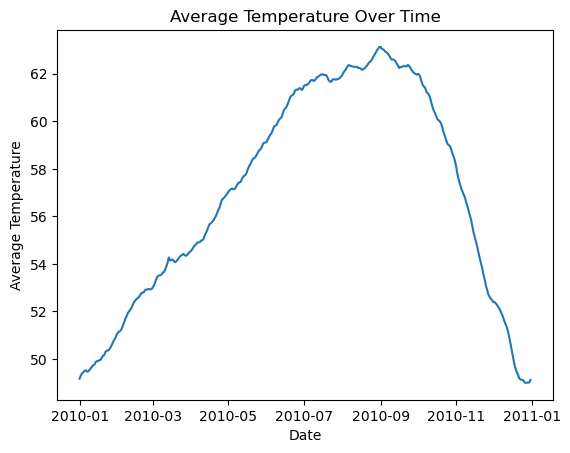

In [2]:
sf_temps['date'] = pd.to_datetime(sf_temps['date'])
sf_temps = sf_temps.set_index('date')

daily_avg_temps = sf_temps.resample('D').mean()

plt.plot(daily_avg_temps.index, daily_avg_temps['temp'])
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title('Average Temperature Over Time')
plt.show()

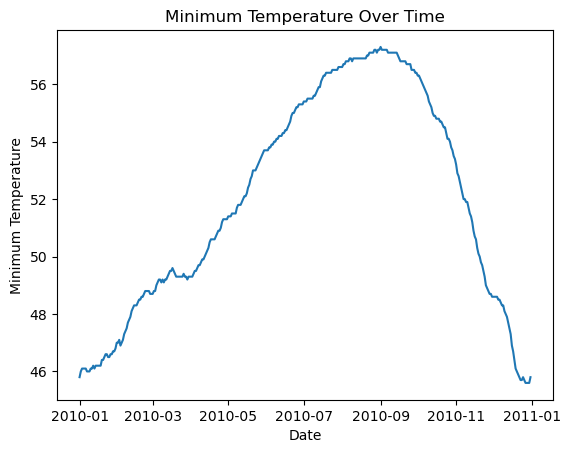

In [3]:
daily_min_temps = sf_temps.resample('D').min()

plt.plot(daily_min_temps.index, daily_min_temps['temp'])
plt.xlabel('Date')
plt.ylabel('Minimum Temperature')
plt.title('Minimum Temperature Over Time')
plt.show()

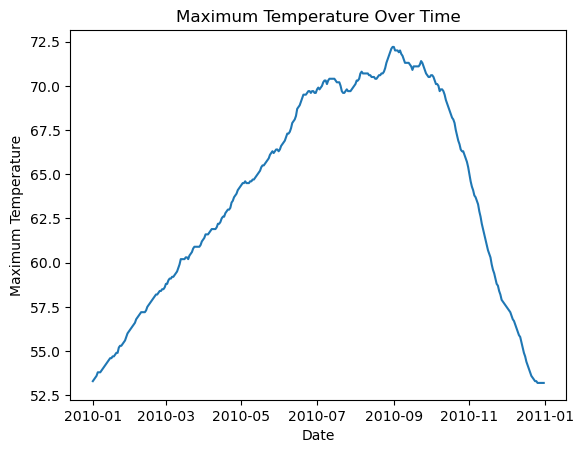

In [4]:
daily_max_temps = sf_temps.resample('D').max()

plt.plot(daily_max_temps.index, daily_max_temps['temp'])
plt.xlabel('Date')
plt.ylabel('Maximum Temperature')
plt.title('Maximum Temperature Over Time')
plt.show()

In [5]:
monthly_avg_temps = sf_temps.resample('M').mean()
coldest_month = monthly_avg_temps.idxmin()['temp'].strftime('%B')
hottest_month = monthly_avg_temps.idxmax()['temp'].strftime('%B')

print(f'The coldest month on average is {coldest_month}.')
print(f'The hottest month on average is {hottest_month}.')

The coldest month on average is January.
The hottest month on average is September.


In [6]:
daily_min_max_temps = sf_temps.resample('D').agg(['min', 'max'])
daily_min_max_temps['temp_diff'] = daily_min_max_temps['temp']['max'] - daily_min_max_temps['temp']['min']
monthly_temp_variability = daily_min_max_temps.resample('M')['temp_diff'].mean()
highest_variability_month = monthly_temp_variability.idxmax().strftime('%B')

print(f'The month with the highest daily temperature variability is {highest_variability_month}.')

The month with the highest daily temperature variability is September.


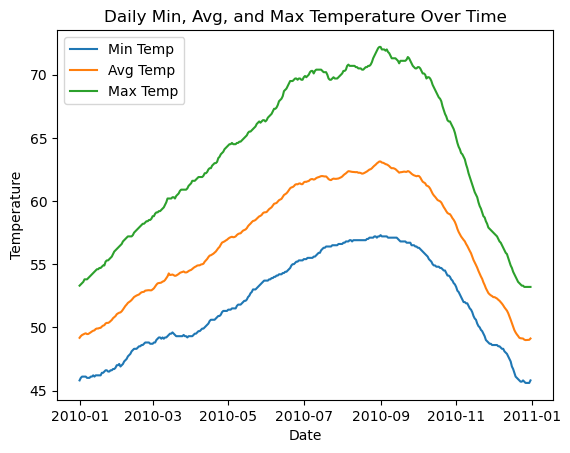

In [7]:
fig, ax = plt.subplots()

ax.plot(daily_min_temps.index, daily_min_temps['temp'], label='Min Temp')
ax.plot(daily_avg_temps.index, daily_avg_temps['temp'], label='Avg Temp')
ax.plot(daily_max_temps.index, daily_max_temps['temp'], label='Max Temp')

ax.set_xlabel('Date')
ax.set_ylabel('Temperature')
ax.set_title('Daily Min, Avg, and Max Temperature Over Time')
ax.legend()

plt.show()

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from vega_datasets import data

seattle_weather = data.seattle_weather()

In [10]:
seattle_weather['date'] = pd.to_datetime(seattle_weather['date'])
seattle_weather = seattle_weather.set_index('date')

In [11]:
monthly_precipitation = seattle_weather['precipitation'].resample('M').sum()
max_precipitation_month = monthly_precipitation.idxmax().strftime('%Y-%m')

print(f'The year and month with the highest amount of precipitation is {max_precipitation_month}.')

The year and month with the highest amount of precipitation is 2015-12.


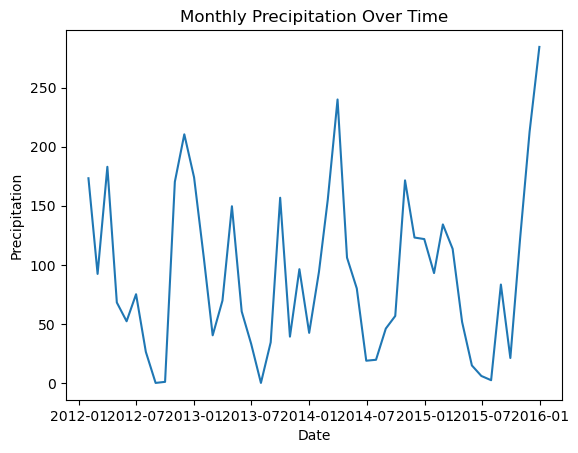

In [12]:
plt.plot(monthly_precipitation.index, monthly_precipitation.values)
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('Monthly Precipitation Over Time')
plt.show()

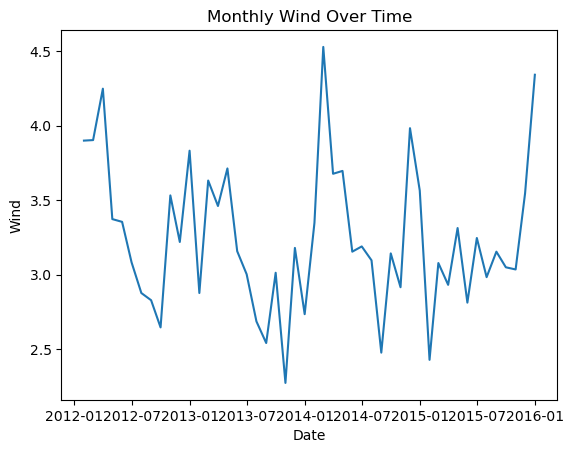

In [13]:
monthly_wind = seattle_weather['wind'].resample('M').mean()

plt.plot(monthly_wind.index, monthly_wind.values)
plt.xlabel('Date')
plt.ylabel('Wind')
plt.title('Monthly Wind Over Time')
plt.show()

In [14]:
windiest_month = monthly_wind.idxmax().strftime('%Y-%m')

print(f'The windiest year-month combination is {windiest_month}.')

The windiest year-month combination is 2014-02.


In [15]:
sunny_days = seattle_weather[seattle_weather['weather'] == 'sun']
sunny_days_count = sunny_days.resample('Y').count()
sunniest_year = sunny_days_count.idxmax()['weather'].strftime('%Y')

print(f'The sunniest year is {sunniest_year}.')


The sunniest year is 2014.


In [16]:
seattle_weather['month'] = seattle_weather.index.month
monthly_rainfall = seattle_weather.groupby('month')['precipitation'].sum()
rainiest_month = monthly_rainfall.idxmax()

print(f'The month with the most rain is {rainiest_month}.')


The month with the most rain is 11.


In [17]:
non_zero_precipitation = seattle_weather[seattle_weather['precipitation'] > 0]
non_zero_precipitation_count = non_zero_precipitation.groupby('month')['precipitation'].count()
most_non_zero_precipitation_month = non_zero_precipitation_count.idxmax()

print(f'The month with the most number of days with a non-zero amount of precipitation is {most_non_zero_precipitation_month}.')


The month with the most number of days with a non-zero amount of precipitation is 12.
